# Research Sources:

The machine learning models often come from the implementation of research papers such as the followings 


Decision Tree: 
http://scikit-learn.org/stable/modules/tree.html#

Random Forest: 
http://scikit-learn.org/stable/modules/ensemble.html

Gradient Boosting: 
https://en.wikipedia.org/wiki/Gradient_boosting

Gradient Boosting Machine: 
https://statweb.stanford.edu/~jhf/ftp/trebst.pdf

XGBoost: 
https://arxiv.org/pdf/1603.02754.pdf

LightGBM: 
https://papers.nips.cc/paper/6907-lightgbm-a-highly-efficient-gradient-boosting-decision-tree.pdf

CatBoost: 
https://arxiv.org/pdf/1706.09516.pdf


In addition to study original research paper to better understand how to optimize the model, we can have other indirect methods to understand the models better. For example, partial dependance plot and cross validation

# What Are Partial Dependence Plots
Some people complain machine learning models are black boxes. These people will argue we cannot see how these models are working on any given dataset, so we can neither extract insight nor identify problems with the model. If you are familiar with linear or logistic regression models, partial dependence plots can be interpreted similarly to the coefficients in those models. The partial dependence plot is calculated only after the model has been fit. Partial dependence plots show how each variable or predictor affects the model's predictions. 
The following questions are valuable to ask when model is fitted:

* How much of wage differences between men and women are due solely to gender, as opposed to differences in education backgrounds or work experience?

* Controlling for house characteristics, what impact do longitude and latitude have on home prices? To restate this, we want to understand how similarly sized houses would be priced in different areas, even if the homes actually at these sites are different sizes.

* Are health differences between two groups due to differences in their diets, or due to other factors?

Set the x-axis as one of the predictors, with the given range, so that the prediction varies with the adjusted quality. For example, when we are making prediction on the house price, the target variable is sales price, and the y-axis is set to be sales price. The distance between central business district is set to be the x-axis. We can then see how the prediction result varies according to the change is predictors. 

![](img/partialdependance.png)

In [1]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
from sklearn.preprocessing import Imputer
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cols_to_use = ['Distance', 'Landsize', 'BuildingArea']

In [3]:

def get_some_data():
    data = pd.read_csv('data/melb_data.csv')
    y = data.Price
    X = data[cols_to_use]
    my_imputer = Imputer()
    imputed_X = my_imputer.fit_transform(X)
    return imputed_X, y


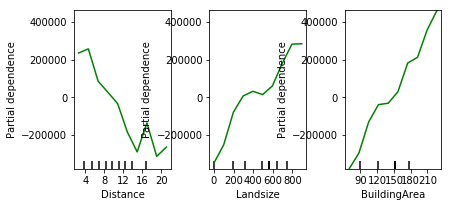

In [4]:
X, y = get_some_data()
my_model = GradientBoostingRegressor()
my_model.fit(X, y)

my_plots = plot_partial_dependence(my_model,
                                   features=[0,1,2],
                                   X=X,
                                   feature_names=cols_to_use,
                                   grid_resolution=10)


In [5]:
def get_some_data():
    cols_to_use = ['Distance', 'Landsize', 'BuildingArea']
    data = pd.read_csv('data/melb_data.csv')
    y = data.Price
    X = data[cols_to_use]
    my_imputer = Imputer()
    imputed_X = my_imputer.fit_transform(X)
    return imputed_X, y


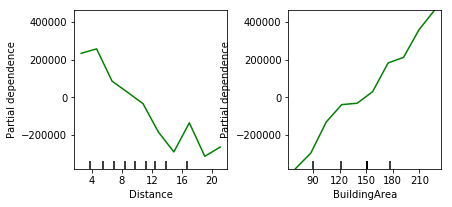

In [6]:
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence

# get_some_data is defined in hidden cell above.
X, y = get_some_data()
# scikit-learn originally implemented partial dependence plots only for Gradient Boosting models
# this was due to an implementation detail, and a future release will support all model types.
my_model = GradientBoostingRegressor()
# fit the model as usual
my_model.fit(X, y)
# Here we make the plot
my_plots = plot_partial_dependence(my_model,       
                                   features=[0, 2], # column numbers of plots we want to show
                                   X=X,            # raw predictors data.
                                   feature_names=['Distance', 'Landsize', 'BuildingArea'], # labels on graphs
                                   grid_resolution=10) # number of values to plot on x axis


# Underfitting and Overfitting 

This is a phenomenon called overfitting, where a model matches the training data almost perfectly, but does poorly in validation and other new data. On the flip side, if we make our tree very shallow, it doesn't divide up the houses into very distinct groups.

At an extreme, if a tree divides houses into only 2 or 4, each group still has a wide variety of houses. Resulting predictions may be far off for most houses, even in the training data (and it will be bad in validation too for the same reason). When a model fails to capture important distinctions and patterns in the data, so it performs poorly even in training data, that is called underfitting.

Since we care about accuracy on new data, which we estimate from our validation data, we want to find the sweet spot between underfitting and overfitting. Visually, we want the low point of the (red) validation curve in

![](img/overfitting.png)

In [7]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

def get_mae(max_leaf_nodes, predictors_train, predictors_val, targ_train, targ_val):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(predictors_train, targ_train)
    preds_val = model.predict(predictors_val)
    mae = mean_absolute_error(targ_val, preds_val)
    return(mae)

In [8]:
# Data Loading Code Runs At This Point
import pandas as pd
    
# Load data
melbourne_file_path = 'data/melb_data.csv'
melbourne_data = pd.read_csv(melbourne_file_path) 
# Filter rows with missing values
filtered_melbourne_data = melbourne_data.dropna(axis=0)
# Choose target and predictors
y = filtered_melbourne_data.Price
melbourne_predictors = ['Rooms', 'Bathroom', 'Landsize', 'BuildingArea', 
                        'YearBuilt', 'Lattitude', 'Longtitude']
X = filtered_melbourne_data[melbourne_predictors]

from sklearn.model_selection import train_test_split

# split data into training and validation data, for both predictors and target
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)

In [9]:
# compare MAE with differing values of max_leaf_nodes
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  347380
Max leaf nodes: 50  		 Mean Absolute Error:  257829
Max leaf nodes: 500  		 Mean Absolute Error:  243176
Max leaf nodes: 5000  		 Mean Absolute Error:  254915


Of the options listed, 500 is the optimal number of leaves. Apply the function to your Iowa data to find the best decision tree.

Here's the takeaway: Models can suffer from either:

Overfitting: capturing spurious patterns that won't recur in the future, leading to less accurate predictions, or
Underfitting: failing to capture relevant patterns, again leading to less accurate predictions.
We use validation data, which isn't used in model training, to measure a candidate model's accuracy. This lets us try many candidate models and keep the best one.


# Cross-Validation and Train-Test Split

Cross-validation gives a more accurate measure of model quality, which is especially important if you are making a lot of modeling decisions. However, it can take more time to run, because it estimates models once for each fold. 

Given these tradeoffs, when should you use each approach? On small datasets, the extra computational burden of running cross-validation isn't a big deal. These are also the problems where model quality scores would be least reliable with train-test split. So, if your dataset is smaller, you should run cross-validation.

For the same reasons, a simple train-test split is sufficient for larger datasets. It will run faster, and you may have enough data that there's little need to re-use some of it for holdout.

There's no simple threshold for what constitutes a large vs small dataset. If your model takes a couple minute or less to run, it's probably worth switching to cross-validation. If your model takes much longer to run, cross-validation may slow down your workflow more than it's worth.

Alternatively, you can run cross-validation and see if the scores for each experiment seem close. If each experiment gives the same results, train-test split is probably sufficient.


In [10]:
import pandas as pd
data = pd.read_csv('data/melb_data.csv')
cols_to_use = ['Rooms', 'Distance', 'Landsize', 'BuildingArea', 'YearBuilt']
X = data[cols_to_use]
y = data.Price

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer
my_pipeline = make_pipeline(Imputer(), RandomForestRegressor())

In [12]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(my_pipeline, X, y, scoring='neg_mean_absolute_error')
print(scores)

[-324731.46070863 -301642.79333138 -281689.18645575]


In [13]:
print('Mean Absolute Error %2f' %(-1 * scores.mean()))

Mean Absolute Error 302687.813499


In [14]:
# Reference:
# https://www.kaggle.com/dansbecker/partial-dependence-plots/
# https://www.kaggle.com/dansbecker/underfitting-overfitting-and-model-optimization
# https://www.kaggle.com/dansbecker/cross-validation